In [4]:
import numpy as np
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea

In [5]:
data_path = 'C:/Users/hosea/OneDrive/Documents/CSE 578/Project/adult.data'
test_path = 'C:/Users/hosea/OneDrive/Documents/CSE 578/Project/adult.test'

In [6]:
column_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
data = pd.read_table(data_path, delimiter = ',', names = column_labels)
test = pd.read_table(test_path, delimiter = ',', names = column_labels)
display(data)
display(test)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,|1x3 Cross validator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16277,39,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K.
16278,64,?,321403.0,HS-grad,9.0,Widowed,?,Other-relative,Black,Male,0.0,0.0,40.0,United-States,<=50K.
16279,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
16280,44,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K.


In [7]:
race =pd.crosstab(data['race'], data['income']).apply(lambda r: r/r.sum(), axis=1)*100
race.sort_values(by=' >50K', ascending=False, inplace=True)
race

income,<=50K,>50K
race,,
Asian-Pac-Islander,73.435996,26.564004
White,74.414006,25.585994
Black,87.612036,12.387964
Amer-Indian-Eskimo,88.424437,11.575563
Other,90.774908,9.225092


<AxesSubplot:>

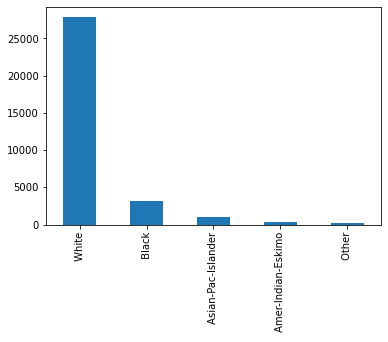

In [9]:
# Most of the participants are white
data['race'].value_counts().plot.bar()

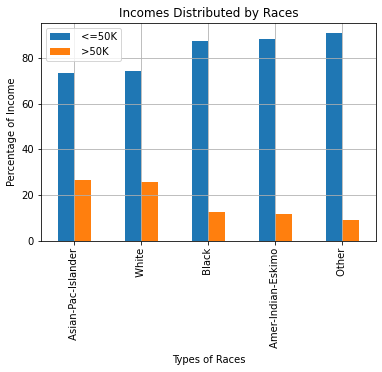

In [8]:
df = race[race.columns[-2:]]
fig, ax = plt.subplots(1,1)
df.plot(kind='bar', ax=ax)
ax.legend()
plt.title("Incomes Distributed by Races")
plt.ylabel("Percentage of Income")
plt.xlabel("Types of Races")
plt.grid(True)
plt.show()

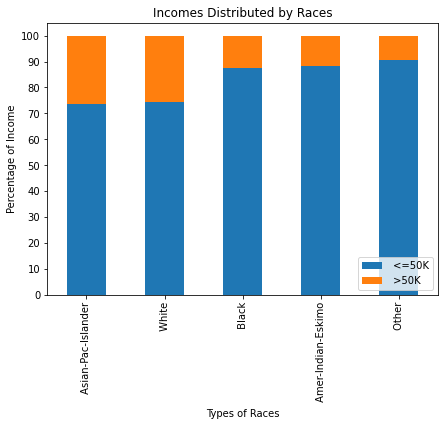

In [14]:
# Asian-Pacific Islands and Whites have higher incomes
race.plot.bar(stacked=True, figsize=(7, 5))
plt.legend(loc='lower right')
plt.yticks(list(range(0, 101, 10)))
plt.title("Incomes Distributed by Races")
plt.ylabel("Percentage of Income")
plt.xlabel("Types of Races")
plt.show()